# <font color='green'>Project 1 
## Group 26 
### Members: 
1.Durgalakshmi Sundaraman(dxs190016)                                                                                         
2.Kruthika Natarajan Nirmala(kxn190008)

## <font color='green'> Classification

### This project predicts the target variable which is categorical in nature. Thus the models used in this are mainly:


#### 1) KNN classification
#### 2) Logistic Regression
#### 3) Decision Tree
#### 4) Linear SVM
#### 5) Kernel SVM (RBF, Linear, Poly)

### Importing necessary libraries for the project

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

### Dataset for classification

In [2]:
#reading the dataset
df_hotel = pd.read_excel("C:\\Users\\sundh\\Desktop\\ML Project\\ML Classification\\hotel_cancel_predictions.xlsx")
#checking the shape of the dataset
df_hotel.shape

(1207, 19)

This dataset is  taken from kaggel from  Global Health Observatory (GHO) data repository under World Health Organization (WHO). It contains hotel booking information and includes information such as for which date booking was made, the lead time,the week night and weekend night stay, the number of adults, children, and/or babies, and the number of available parking spaces etc. There are <b>1207 total observations</b> with <b>19 columns</b>. Out of this 19 columns we have 6 categorical variables and the target column is with 1 representing a cancellation made and 0 representing no cancellation.

The <b>target variable</b> in this is <b>is_canceled</b> variable . The model works to predict the life expectancy of a person given his living conditions


<b>Column                         : Description</b><br>
<b>is_canceled </b>                    : Target variable if booking was cancelled<br>
<b>lead_time  </b>                     : No. of days between booking and hotel checkin <br>
<b>arrival_date_month</b>              : Month of hotel booking<br>
<b>arrival_date_week_number  </b>      : Week number of hotel booking<br>
<b>arrival_date_day_of_month </b>      : Day of hotel booking<br>
<b>stays_in_weekend_nights  </b>       : No. of weekend nights stayed<br>
<b>stays_in_week_nights   </b>         : No. of week nights stayed<br>
<b>adults              </b>            : No. of adults<br>
<b>children         </b>               : No. of children<br>
<b>babies         </b>                 : No. of babies<br>
<b>meal            </b>                : Meal plan booked<br>
<b>market_segment   </b>               : Market segment of the customer<br>
<b>distribution_channel </b>           : distribution channel the customer is in<br>
<b>booking_changes    </b>             : No. of booking changes made<br>
<b>deposit_type    </b>                : Deposite type made<br>
<b>days_in_waiting_list  </b>          : No. of days in waiting for booking<br>
<b>adr                   </b>          : Dollars paid<br>
<b>required_car_parking_spaces   </b>  : No. of car parking spaces<br>
<b>reservation_status      </b>        : status of reservation<br>


## Exploratory Data Analysis

The exploratory data analysis is performed on the dataset to understand the variations, range, detect outliers and collinearity if it exists in the dataset.

### <b>Check for null</b>

 Upon checking for null we find that 1728 of the data cells in the dataset have a randomly disbursed null presence

In [3]:
#Checking data information
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_canceled                  1112 non-null   float64
 1   lead_time                    1132 non-null   float64
 2   arrival_date_month           1120 non-null   object 
 3   arrival_date_week_number     1119 non-null   float64
 4   arrival_date_day_of_month    1097 non-null   float64
 5   stays_in_weekend_nights      1111 non-null   float64
 6   stays_in_week_nights         1114 non-null   float64
 7   adults                       1116 non-null   float64
 8   children                     1117 non-null   float64
 9   babies                       1124 non-null   float64
 10  meal                         1118 non-null   object 
 11  market_segment               1125 non-null   object 
 12  distribution_channel         1107 non-null   object 
 13  booking_changes   

There are totally 19 columns with more than two categorical columns 

In [4]:
#Total count of null
df_hotel.isna().sum().sum()

1728

In [5]:
#Count of null by column
df_hotel.isna().sum()

is_canceled                     95
lead_time                       75
arrival_date_month              87
arrival_date_week_number        88
arrival_date_day_of_month      110
stays_in_weekend_nights         96
stays_in_week_nights            93
adults                          91
children                        90
babies                          83
meal                            89
market_segment                  82
distribution_channel           100
booking_changes                 97
deposit_type                    90
days_in_waiting_list            93
adr                             90
required_car_parking_spaces     80
reservation_status              99
dtype: int64

To handle the null we check the data in the first five rows

In [6]:
#reading the first five rows in the dataset
df_hotel.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces,reservation_status
0,0.0,26.0,March,12.0,17.0,2.0,NaN,2.0,0.0,0.0,NaN,Online TA,TA/TO,0.0,No Deposit,0.0,72.89,0.0,Check-Out
1,1.0,NaN,October,44.0,28.0,2.0,5.0,2.0,0.0,0.0,BB,Online TA,TA/TO,0.0,No Deposit,0.0,63.03,0.0,Canceled
2,0.0,0.0,April,16.0,12.0,0.0,5.0,1.0,0.0,0.0,BB,Offline TA/TO,NaN,0.0,No Deposit,0.0,55.00,0.0,NaN
3,0.0,0.0,May,21.0,NaN,1.0,1.0,2.0,0.0,0.0,BB,Online TA,TA/TO,1.0,No Deposit,0.0,79.20,0.0,Check-Out
4,0.0,138.0,NaN,13.0,NaN,0.0,3.0,2.0,0.0,0.0,BB,Offline TA/TO,TA/TO,1.0,No Deposit,0.0,42.67,0.0,Check-Out


<b>Handle Null</b>
To handle the null, we choose to impute the mean value of the numeric columns and for categorical variables we have imputed the value with most count

In [7]:
#Fill NULL with mean of the column data
df_hotel['is_canceled'].fillna(df_hotel['is_canceled'].mean(), inplace=True)
df_hotel['lead_time'].fillna(df_hotel['lead_time'].mean(), inplace=True)
df_hotel['arrival_date_day_of_month'].fillna(df_hotel['arrival_date_day_of_month'].mean(), inplace=True)
df_hotel['stays_in_weekend_nights'].fillna(df_hotel['stays_in_weekend_nights'].mean(), inplace=True)
df_hotel['stays_in_week_nights'].fillna(df_hotel['stays_in_week_nights'].mean(), inplace=True)
df_hotel['adults'].fillna(df_hotel['adults'].mean(), inplace=True)
df_hotel['children'].fillna(df_hotel['children'].mean(), inplace=True)
df_hotel['adr'].fillna(df_hotel['adr'].mean(), inplace=True)
df_hotel['booking_changes'].fillna(df_hotel['booking_changes'].mean(), inplace=True)
df_hotel['market_segment'].fillna(df_hotel['market_segment'].value_counts().index[0], inplace=True)
df_hotel['arrival_date_week_number'].fillna(df_hotel['arrival_date_week_number'].mean(), inplace=True)
df_hotel['arrival_date_month'].fillna(df_hotel['arrival_date_month'].value_counts().index[0], inplace=True)
df_hotel['babies'].fillna(df_hotel['babies'].mean(), inplace=True)
df_hotel['meal'].fillna(df_hotel['meal'].value_counts().index[0], inplace=True)
df_hotel['distribution_channel'].fillna(df_hotel['distribution_channel'].value_counts().index[0], inplace=True)
df_hotel['required_car_parking_spaces'].fillna(df_hotel['required_car_parking_spaces'].mean(), inplace=True)
df_hotel['reservation_status'].fillna(df_hotel['reservation_status'].value_counts().index[0], inplace=True)
df_hotel['days_in_waiting_list'].fillna(df_hotel['days_in_waiting_list'].mean(), inplace=True)
df_hotel['deposit_type'].fillna(df_hotel['deposit_type'].value_counts().index[0], inplace=True)


We check to see if all the columns have 0 null presence

In [8]:
#checking for nulls in each column
df_hotel.isna().sum()

is_canceled                    0
lead_time                      0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
market_segment                 0
distribution_channel           0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
adr                            0
required_car_parking_spaces    0
reservation_status             0
dtype: int64

In [9]:
#Changing the datatype from float to integer
df_hotel['lead_time']=df_hotel['lead_time'].astype(int)
df_hotel['arrival_date_day_of_month']=df_hotel['arrival_date_day_of_month'].astype(int)
df_hotel['stays_in_weekend_nights']=df_hotel['stays_in_weekend_nights'].astype(int)
df_hotel['stays_in_week_nights']=df_hotel['stays_in_week_nights'].astype(int)
df_hotel['stays_in_weekend_nights']=df_hotel['stays_in_weekend_nights'].astype(int)
df_hotel['adults']=df_hotel['adults'].astype(int)
df_hotel['children']=df_hotel['children'].astype(int)
df_hotel['booking_changes']=df_hotel['booking_changes'].astype(int)
df_hotel['is_canceled']=df_hotel['is_canceled'].astype(int)



### Data Visualisation

We check the spread of the target variable is_canceled. We see that most of the hotel bookings in our dataset are not canceled.

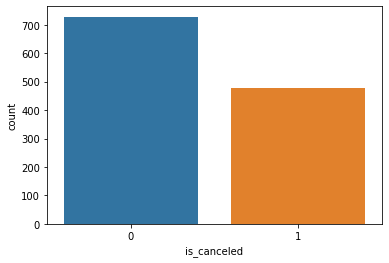

In [10]:
#Plot depicting the number of cancellations
sns.countplot(data=df_hotel,x=df_hotel.is_canceled)
plt.show()

Visualising the spread of cancellations and booking over the months. 
It can be seen that most of the bookings done in March are not cancelled and August has least booking.
Maximum booking cancellation are also done in March with least in January

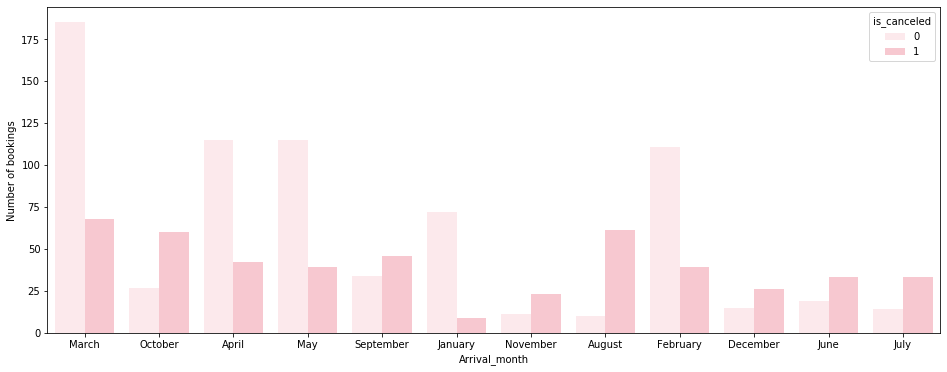

In [11]:
#Plotting number of cancellations and confirmed bookings done month-wise
plt.figure(figsize=(16, 6))
plot2=sns.countplot(data=df_hotel,x=df_hotel.arrival_date_month,hue=df_hotel.is_canceled,color='Pink')
plot2.set(xlabel="Arrival_month", ylabel="Number of bookings")
plt.show()

Checking the presence of outliera in is_canceled with respect to the lead time which is the number of days between the booking made and the date of hotel stay
We find that as the lead days increases, the outliers are present in both cancelled as well as confirmed bookings.
But we dont remove these to as it would be the case in real time data

<Figure size 1440x432 with 0 Axes>

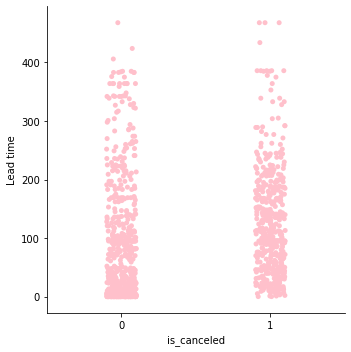

In [12]:
#PLotting the scatterplot of lead times of canceled and confirmed bookings
plt.figure(figsize=(20, 6))
plot2=sns.catplot(data=df_hotel,x='is_canceled',y='lead_time',color='Pink')#,order=[0,1]
plot2.set(xlabel="is_canceled", ylabel="Lead time")
plt.show()

Cancelled a booking always puts a hole in the pocket. We can see the variation in the dollars spent in this case.

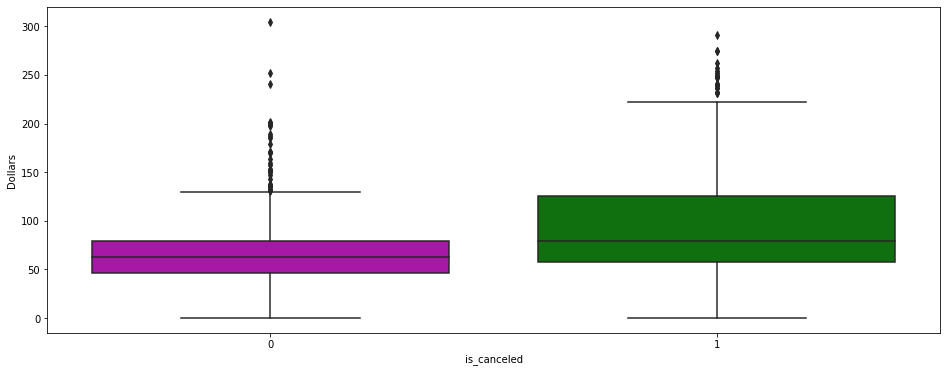

In [13]:
# Plotting the box plot depicting the dollar amount spent for canceled and confirmed bookings
plt.figure(figsize=(16, 6))
plot3=sns.boxplot(data=df_hotel,x='is_canceled', y='adr',
            palette=["m", "g"])
#sns.despine(offset=10, trim=True)
plot3.set(xlabel="is_canceled", ylabel="Dollars")
plt.show()

Weekends are always for getaways and sometime it ends up with a spoiler. This can be seen in the plot below showing that cancellations are more in weekend night stays as people tentatively make a booking

<Figure size 1440x432 with 0 Axes>

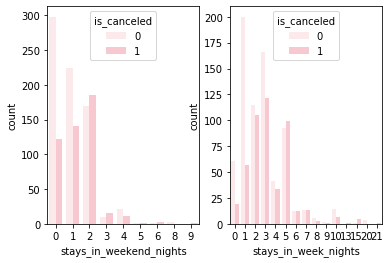

In [14]:
#Plotting the count of canceled and confirmed bookings having weekend and week nights 
plt.figure(figsize=(20, 6))
fig, ax =plt.subplots(1,2)
sns.countplot(data=df_hotel,x='stays_in_weekend_nights',hue='is_canceled',color='Pink', ax=ax[0])
sns.countplot(data=df_hotel,x='stays_in_week_nights',hue='is_canceled',color='Pink', ax=ax[1])
plt.show()


The number of changes made to a booking are visualised and can be infered that people who dont cancel make more changes to their bookings

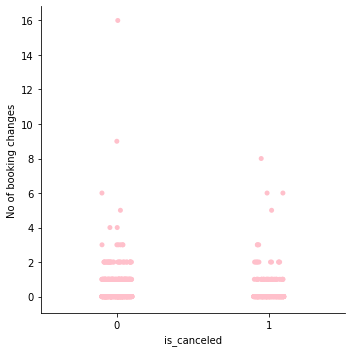

In [15]:
#Plotting the booking changes done for canceled and confirmed bookings
plot2=sns.catplot(data=df_hotel,x='is_canceled',y='booking_changes',color='Pink')
plot2.set(xlabel="is_canceled", ylabel="No of booking changes")
plt.show()

When no deposit is expected upfront to make a booking, people are seen to book more and cancel it as well

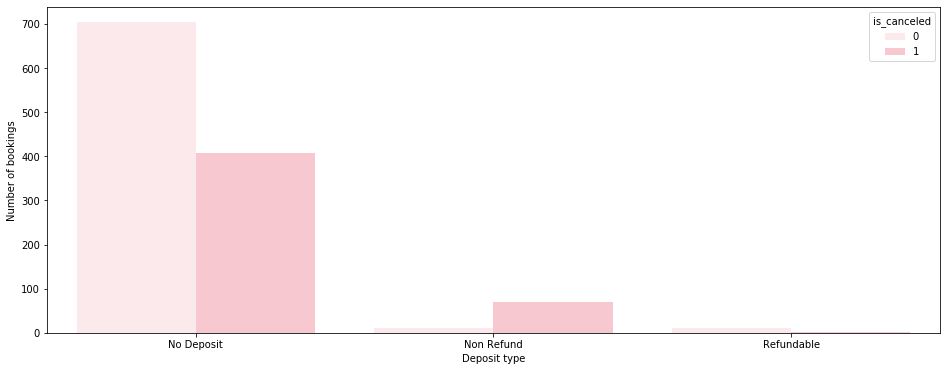

In [16]:
#Plotting the deposit type for confirmed and canceled bookings
plt.figure(figsize=(16, 6))
plot2=sns.countplot(data=df_hotel,x='deposit_type',hue='is_canceled',color='Pink')
plot2.set(xlabel="Deposit type", ylabel="Number of bookings")
plt.show()5PPPPO           

We check for correlation among the variables

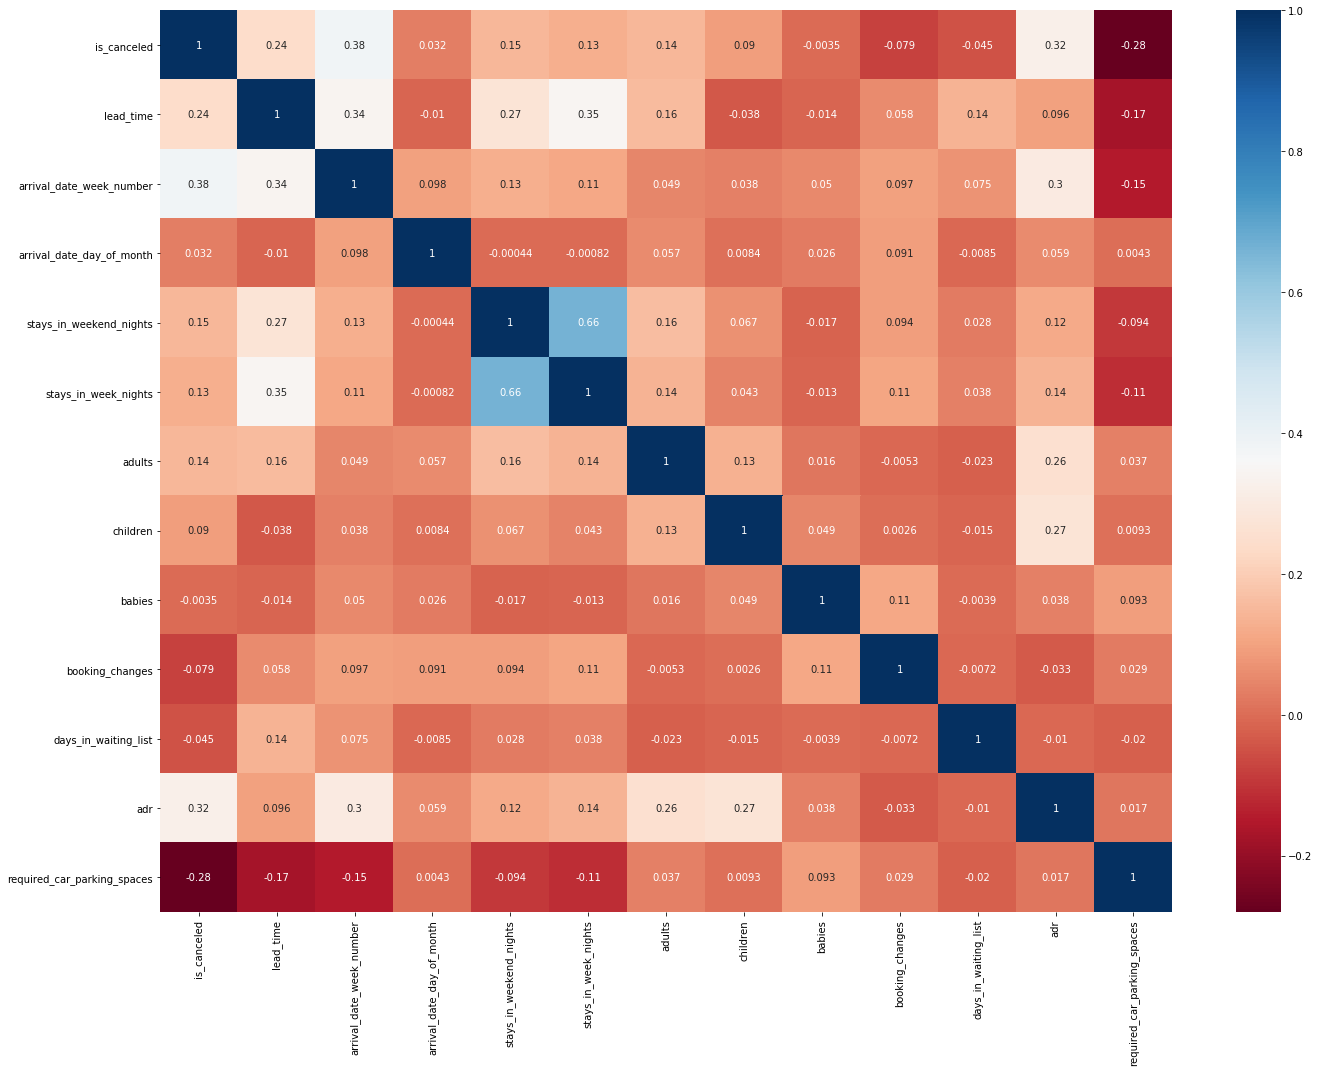

In [17]:
# Making Correlation Matrix to find the relations between the variables
plt.figure(figsize=(20,15))
sns.heatmap(df_hotel.corr(), cmap='RdBu', annot=True)
plt.tight_layout()

Distribution of all variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019EBCBA2908>,
      dtype=object)

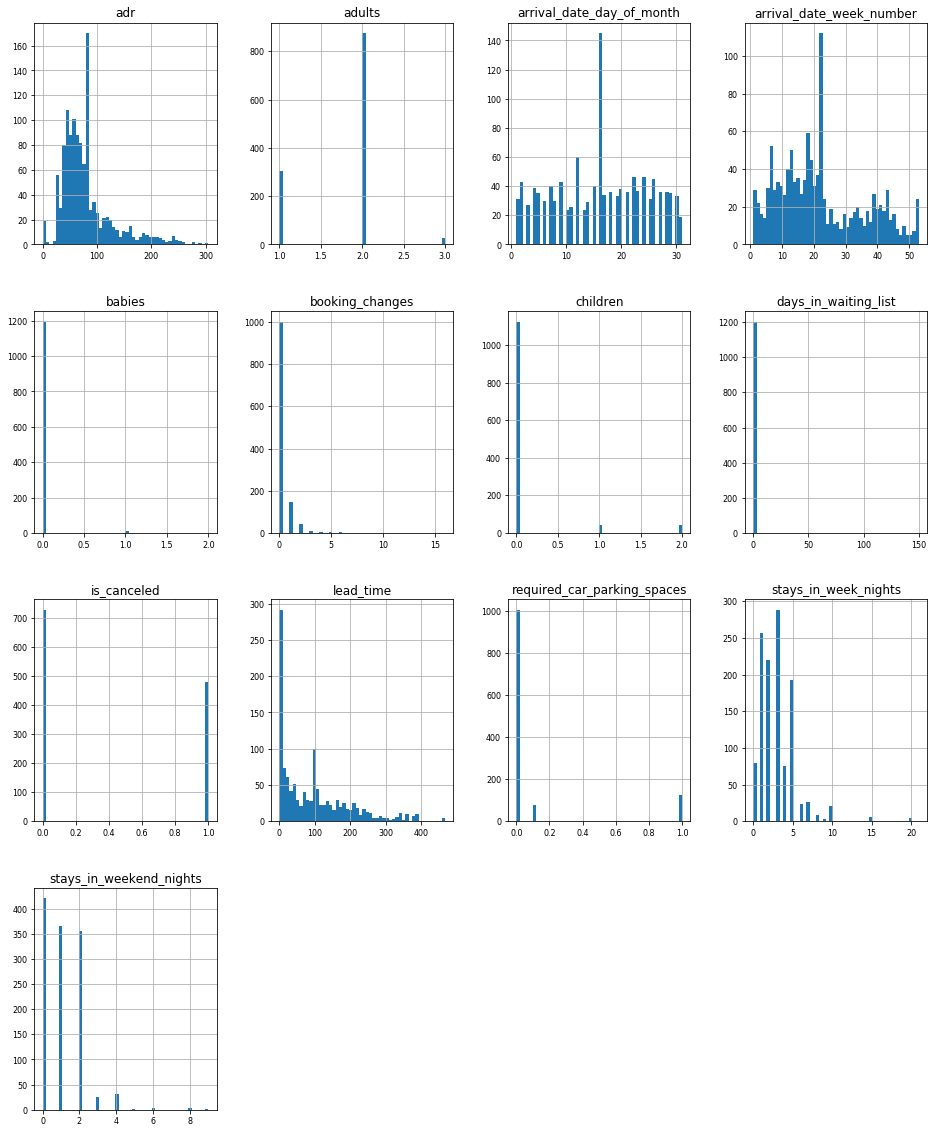

In [18]:
#Further exploration using histogram to check the distributions
df_hotel.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Handle categorical variables

The categorical variables need to be converted to dummy variables which add more columns. Categorical variables will be represented as 0 or 1 in the columns 

In [19]:
#creating dummies for arrival_date_month column
cols = pd.get_dummies(df_hotel['arrival_date_month'], prefix= 'arrival_month')
df_hotel[cols.columns] = cols
df_hotel.drop('arrival_date_month', axis = 1, inplace = True)

In [20]:
#creating dummies for meal column
cols = pd.get_dummies(df_hotel['meal'], prefix= 'meal')
df_hotel[cols.columns] = cols
df_hotel.drop('meal', axis = 1, inplace = True)

In [21]:
#creating dummies for market_segment column
cols = pd.get_dummies(df_hotel['market_segment'], prefix= 'market_segment')
df_hotel[cols.columns] = cols
df_hotel.drop('market_segment', axis = 1, inplace = True)


In [22]:
#creating dummies for deposit_type column
cols = pd.get_dummies(df_hotel['deposit_type'], prefix= 'deposit_type')
df_hotel[cols.columns] = cols
df_hotel.drop('deposit_type', axis = 1, inplace = True)

In [23]:
#creating dummies for arrival_date_month column
cols = pd.get_dummies(df_hotel['distribution_channel'], prefix= 'distribution_channel')
df_hotel[cols.columns] = cols
df_hotel.drop('distribution_channel', axis = 1, inplace = True)

In [24]:
#creating dummies for reservation_status column
cols = pd.get_dummies(df_hotel['reservation_status'], prefix= 'reservation_status')
df_hotel[cols.columns] = cols
df_hotel.drop('reservation_status', axis = 1, inplace = True)

In [25]:
#reading the first five rows in the dataset
df_hotel.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,...,market_segment_Online TA,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_TA/TO,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,26,12.0,17,2,3,2,0,0.0,0,...,1,1,0,0,0,0,1,0,1,0
1,1,95,44.0,28,2,5,2,0,0.0,0,...,1,1,0,0,0,0,1,1,0,0
2,0,0,16.0,12,0,5,1,0,0.0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,0,21.0,16,1,1,2,0,0.0,1,...,1,1,0,0,0,0,1,0,1,0
4,0,138,13.0,16,0,3,2,0,0.0,1,...,0,1,0,0,0,0,1,0,1,0


In [26]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     1207 non-null   int32  
 1   lead_time                       1207 non-null   int32  
 2   arrival_date_week_number        1207 non-null   float64
 3   arrival_date_day_of_month       1207 non-null   int32  
 4   stays_in_weekend_nights         1207 non-null   int32  
 5   stays_in_week_nights            1207 non-null   int32  
 6   adults                          1207 non-null   int32  
 7   children                        1207 non-null   int32  
 8   babies                          1207 non-null   float64
 9   booking_changes                 1207 non-null   int32  
 10  days_in_waiting_list            1207 non-null   float64
 11  adr                             1207 non-null   float64
 12  required_car_parking_spaces     12

In [27]:
#Checking the final list of columns
for col in df_hotel.columns: 
    print(col) 

is_canceled
lead_time
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
booking_changes
days_in_waiting_list
adr
required_car_parking_spaces
arrival_month_April
arrival_month_August
arrival_month_December
arrival_month_February
arrival_month_January
arrival_month_July
arrival_month_June
arrival_month_March
arrival_month_May
arrival_month_November
arrival_month_October
arrival_month_September
meal_BB
meal_FB
meal_HB
meal_Undefined
market_segment_Complementary
market_segment_Corporate
market_segment_Direct
market_segment_Groups
market_segment_Offline TA/TO
market_segment_Online TA
deposit_type_No Deposit
deposit_type_Non Refund
deposit_type_Refundable
distribution_channel_Corporate
distribution_channel_Direct
distribution_channel_TA/TO
reservation_status_Canceled
reservation_status_Check-Out
reservation_status_No-Show


In [28]:
#checking the number of nulls in each column
df_hotel.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
arrival_month_April               0
arrival_month_August              0
arrival_month_December            0
arrival_month_February            0
arrival_month_January             0
arrival_month_July                0
arrival_month_June                0
arrival_month_March               0
arrival_month_May                 0
arrival_month_November            0
arrival_month_October             0
arrival_month_September           0
meal_BB                           0
meal_FB                           0
meal_HB                     

In [29]:
#Checking the number of rows and columns
df_hotel.shape

(1207, 44)

### Train and Test Split
The test and train split is done with 0.2

In [30]:
#X and y split
y = df_hotel['is_canceled'].values
X = df_hotel.drop(['is_canceled'], axis = 1).values

In [31]:
#test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0,test_size=0.2)

In [32]:
#checking X values
X

array([[ 26.,  12.,  17., ...,   0.,   1.,   0.],
       [ 95.,  44.,  28., ...,   1.,   0.,   0.],
       [  0.,  16.,  12., ...,   0.,   1.,   0.],
       ...,
       [112.,  39.,  19., ...,   0.,   1.,   0.],
       [ 32.,  35.,  27., ...,   0.,   1.,   0.],
       [106.,  17.,  23., ...,   1.,   0.,   0.]])

### Scaling
Scaling is done with MinMax scaler which scales the data with respect to the minimum and maximum values, this is better than the standard scaler which will mostly incline towards the mean of the data.

In [33]:
# Scaling the dataset
#through histogram we see that data is not much normally distributed for some of the columns.  
#Hence we use Standard Scaler to normalize and scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## REGRESSION MODELS

### K Nearest Neighbors
The KNN model is run on the dataframe with checking for neighbours upto 10 to find a suitable neighbour to run.
N=1 provides a overfitting model in training but will not do well in test. While a large nighbour will smoothen the classification boundary

In [34]:
#using K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a new knn model
knn = KNeighborsClassifier()

# n_neighbors to test
k = np.arange(10)+1
param_knn= [{'n_neighbors':k}]

#using gridsearch to test all values for n-neighbors
knn_clf = GridSearchCV(knn, param_knn, cv=5)

#fitting the model
knn_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
#Best n_neighbhor value
knn_clf.best_params_

{'n_neighbors': 9}

In [36]:
#Validation score
knn_clf.best_score_

0.9264248704663214

It can be seen that at N=9 we get a model with the best parameters and it is used to run the regression

In [37]:
KNN_best = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(KNN_best.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(KNN_best.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.94
Accuracy of KNN classifier on test set: 0.94


In [38]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(knn,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation scroe: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.94818653 0.88601036 0.94300518 0.91709845 0.92746114]
Average cross-validation scroe: 0.9244


##### Confusion matrix  
Confusion matrix is a good representation of the accuracy with which the model as predicted

In [39]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

KNN_predicted = KNN_best.predict(X_test)
cm = confusion_matrix(y_test, KNN_predicted)
cm

array([[143,   8],
       [  7,  84]], dtype=int64)

In [40]:
# Checking the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,KNN_predicted)*100

93.80165289256198

### Logistic Regression

Logistics regression classified the model by drawing a boundary separating the regions using a algebraic equation. Penalty term L2 is introduced to penalise the varibales with large coefficients.
We model is C parameters to take the best C to model with

In [41]:
#using Logistic Regression
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=100000000)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],'penalty':['l2'] }

In [42]:
# Using Grid search to find the best parameters and fitting the model
logit_clf = GridSearchCV(logit, param_grid,cv=5)
logit_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100000000,
                                          multi_class='auto', n_jobs=None,
                                          penalty='l2', random_state=None,
                                          solver='lbfgs', tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
logit_clf.best_params_


{'C': 1, 'penalty': 'l2'}

C=1 has the best accuracy in the model and thus we take c=1 to build a model 

In [44]:
#using the parmeter to find out the train and test accuracy
LR = LogisticRegression(penalty = 'l2', C= 1)
LR.fit(X_train,y_train)

print('Accuracy of logistic regression on training set: {:.4f}'
     .format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression on test set: {:.4f}'
     .format(logit_clf.score(X_test, y_test)))

Accuracy of logistic regression on training set: 0.9461
Accuracy of logistic regression on test set: 0.9339


In [45]:
#Cross Validation
cvscore = cross_val_score(LR,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.96891192 0.92746114 0.94300518 0.91709845 0.97409326]
Average cross-validation score: 0.9461


In [46]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
LR_pred = LR.predict(X_test)
cm = confusion_matrix(y_test, LR_pred)
cm

array([[143,   8],
       [  8,  83]], dtype=int64)

In [47]:
#Accuracy
accuracy_score(y_test,LR_pred)*100

93.38842975206612

### Decision Tree
Decision tree model builds a parent - child node based tree to map the values a varible can take to land up at a conclusion 
We check with varying depths to take the best depth which would give a good accuracy.

In [48]:
#using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2,3,5,7,15]}
# Using Grid search to find the best parameters and fitting the model
grid_search = GridSearchCV(dt_clf, param_grid, cv = 5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 5, 7, 15]},
             pre_disp

In [49]:
#fiding out the best parameter- depth here
grid_search.best_params_

{'max_depth': 2}

In [50]:
#best score
grid_search.best_score_

0.945077720207254

In [51]:
#training set and test set best accuracy
dt_clf_best = DecisionTreeClassifier(max_depth = 2)
dt_clf_best.fit(X_train,y_train)

print('Train score: {0:0.2f}'.format(dt_clf_best.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(dt_clf_best.score(X_test, y_test)))

Train score: 0.95
Test score: 0.94


In [52]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf_best,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross validation scores: [0.96373057 0.92746114 0.94300518 0.91709845 0.97409326]
Average cross-validation score: 0.95


In [53]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
dt_predicted = dt_clf_best.predict(X_test)
cm = confusion_matrix(y_test, dt_predicted)
cm

array([[143,   8],
       [  7,  84]], dtype=int64)

In [54]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,dt_predicted)*100

93.80165289256198

### Support Vector Machine
SVM uses a hyperplane to divide the data can find a good boundary between the two regions.
We provide different C values to check the performance

In [55]:
#using SVM
from sklearn.svm import SVC
LinSVC = SVC(kernel='linear',max_iter=100000000)
LinSVM_params = {'C':[0.001, 0.01, 0.1, 1, 10,100,1000]}

In [ ]:
# Using Grid search to find the best parameters and fitting the model
LinearSVC_clf = GridSearchCV(LinSVC, LinSVM_params,cv=5)
LinearSVC_clf.fit(X_train,y_train)

In [ ]:
#finding the best parameter
LinearSVC_clf.best_params_

In [ ]:
#applying the best paramerter and finding the test and train accuracy
from sklearn.svm import SVC, LinearSVC

clf = LinearSVC (C=0.01,max_iter=100000000)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
print('Accuracy of linear SVM on training set: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of linear SVM on test set: {:.4f}'
     .format(LinearSVC_clf.score(X_test, y_test)))

In [ ]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='linear',C=1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
LSVM_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, LSVM_pred)
cm

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,LSVM_pred)*100

### SVM With kernel RBF and linear
This svm uses the kernel trick and it has another penalising term gamma
We try C and Gamma with different values to find a best 

In [ ]:
#using Kernel SVM
from sklearn.svm import SVC 
KernelSVC = SVC(max_iter=10000000)
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1],'gamma':[1,0.1,0.001], 'kernel':['rbf','linear']}

In [ ]:
# Using Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train,y_train)

In [ ]:
#finding the best paramrter
KernelSVC_clf.best_params_

Thus we run the model with c=0.01 and gamma=1 
#### Kernel SVM with RBF

In [ ]:
#finding thet train and test accuracy
KernelSVC_clf= SVC(kernel='rbf', C= 0.01, gamma= 1)
KernelSVC_clf.fit(X_train,y_train)
KernelSVC_clf.score(X_train,y_train)
print('Accuracy of Kernelized SVM on training set: {:.2f}'
     .format(KernelSVC_clf.score(X_train, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test, y_test)))

In [ ]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='rbf',C=10,gamma=0.1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
KSVM_pred = KernelSVC_clf.predict(X_test)
cm = confusion_matrix(y_test, KSVM_pred)
cm

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,KSVM_pred)*100

#### Kernel SVM With Poly

In [ ]:
#using kernel SVM poly
from sklearn.svm import SVC 
KernelSVC = SVC(max_iter=10000000)
kernelSVC_params = {'C':[0.01, 0.1, 1, 10],'gamma':[0.01,0.1,1], 'kernel':['poly']}

In [ ]:
# Using Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train,y_train)

In [ ]:
#fiding the best parameter
KernelSVC_clf.best_params_

In [ ]:
#accuracy on both training and test set
kernel_clf= SVC(kernel='poly', C= 1, gamma= 0.1)
kernel_clf.fit(X_train,y_train)
kernel_clf.score(X_train,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernel_clf.score(X_train, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test, y_test)))

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(SVC(kernel='linear',C=1,gamma=1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
KPSVM_pred = kernel_clf.predict(X_test)
cm = confusion_matrix(y_test, KPSVM_pred)
cm

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,KPSVM_pred)*100  

## All Models at a Glance

In [ ]:
models_class=[]

models_class.append({'Model Name' : 'K Nearest Neighbors','Train score': round(KNN_best.score(X_train, y_train),4),
               'Test score': round(KNN_best.score(X_test, y_test),4), 'Accuracy Score' : accuracy_score(y_test,KNN_predicted)*100})

models_class.append({'Model Name' : 'Logistic Regression','Train score': round(LR.score(X_train, y_train),4),
               'Test score': round(LR.score(X_test, y_test),4), 'Accuracy Score' : accuracy_score(y_test,LR_pred)*100})

models_class.append({'Model Name' : 'Decision Tree','Train score': round(dt_clf_best.score(X_train, y_train),4),
               'Test score': round(dt_clf_best.score(X_test, y_test),4), 'Accuracy Score' : accuracy_score(y_test,dt_predicted)*100})

models_class.append({'Model Name' : 'Linear SVM','Train score': round(clf.score(X_train, y_train),4),
                     'Test score': round(clf.score(X_test, y_test),4), 'Accuracy Score' : accuracy_score(y_test,LSVM_pred)*100})

models_class.append({'Model Name' : 'Kernel SVM (RBF and Linear)','Train score': round(KernelSVC_clf.score(X_train, y_train),4),
                     'Test score': round(KernelSVC_clf.score(X_test, y_test),4), 'Accuracy Score' : accuracy_score(y_test,KSVM_pred)*100})

models_class.append({'Model Name' : 'Kernel SVM (Poly)','Train score': round(kernel_clf.score(X_train, y_train),4),
                     'Test score': round(kernel_clf.score(X_test, y_test),4), 'Accuracy Score' : round(accuracy_score(y_test,KPSVM_pred)*100)})

In [ ]:
model_class = pd.DataFrame(models_class)
model_class.set_index('Model Name', inplace = True)
model_class

Thus seeing all the models ran we can decide the best model first by checking on the accuracy score and then choosing the least gap between the traina and test score. This helps to pick a model which is efficient in real time data<br>
The model which is identified to be the best is:
<b>Kernel SVM Poly</b> as it has the highest accuracy of <b>94</b>  and less gap between the train and test. 

Thus we use c=1 and gamma=0.1
C=1 is little intolerant towards the misclassifications and gamma=0.1 is a good penaliser else a higher gamma will result in island formations

In [ ]:
#accuracy on both training and test set
kernel_clf= SVC(kernel='poly', C= 1, gamma= 0.1)
kernel_clf.fit(X_train,y_train)
kernel_clf.score(X_train,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernel_clf.score(X_train, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test, y_test)))

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(SVC(kernel='linear',C=1,gamma=1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(SVC(kernel='linear',C=1,gamma=1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,KPSVM_pred)*100  

Thus our model with kernel svm poly predicts if a hotel booking will be cancelled or not with an accuracy of 94%